In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
df = pd.read_csv('../Data/LD2011_2014.txt', sep=';',low_memory=False, decimal=',', parse_dates=True, index_col=0)
df

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 00:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 00:45:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 01:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-01 01:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 23:00:00,2.538071,22.048364,1.737619,150.406504,85.365854,303.571429,11.305822,282.828283,68.181818,72.043011,...,276.945039,28200.0,1616.033755,1363.636364,29.986962,5.851375,697.102722,176.961603,651.026393,7621.621622
2014-12-31 23:15:00,2.538071,21.337127,1.737619,166.666667,81.707317,324.404762,11.305822,252.525253,64.685315,72.043011,...,279.800143,28300.0,1569.620253,1340.909091,29.986962,9.947338,671.641791,168.614357,669.354839,6702.702703
2014-12-31 23:30:00,2.538071,20.625889,1.737619,162.601626,82.926829,318.452381,10.175240,242.424242,61.188811,74.193548,...,284.796574,27800.0,1556.962025,1318.181818,27.379400,9.362200,670.763828,153.589316,670.087977,6864.864865
2014-12-31 23:45:00,1.269036,21.337127,1.737619,166.666667,85.365854,285.714286,10.175240,225.589226,64.685315,72.043011,...,246.252677,28000.0,1443.037975,909.090909,26.075619,4.095963,664.618086,146.911519,646.627566,6540.540541


In [3]:
df.mean(axis=1)


2011-01-01 00:15:00    185.170582
2011-01-01 00:30:00    186.973796
2011-01-01 00:45:00    187.472569
2011-01-01 01:00:00    184.731029
2011-01-01 01:15:00    178.829390
                          ...    
2014-12-31 23:00:00    357.537176
2014-12-31 23:15:00    347.414910
2014-12-31 23:30:00    344.535698
2014-12-31 23:45:00    339.572190
2015-01-01 00:00:00    335.714052
Length: 140256, dtype: float64

In [4]:
df.to_pickle('../Data/LD2011_2014.pkl')

In [5]:
df_yr = df.resample('Y').sum()
df_yr

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-12-31,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2012-12-31,193131.979695,9.431501e+05,272315.377932,3.501967e+06,1.657138e+06,6.531205e+06,168867.721877,8.926296e+06,1.932516e+06,1.869365e+06,...,1.038898e+07,1.875699e+09,9.832168e+07,1.430611e+08,3.552548e+06,449068.461088,2.047693e+07,4.380392e+06,3.020709e+07,0.000000e+00
2013-12-31,221593.908629,1.034917e+06,77092.962641,3.784563e+06,1.743793e+06,6.745393e+06,259806.105144,9.118872e+06,1.893399e+06,2.130876e+06,...,1.021319e+07,1.706354e+09,8.623444e+07,1.411690e+08,2.708171e+06,459253.364541,1.903222e+07,4.493736e+06,2.907804e+07,6.026577e+08
2014-12-31,142197.969543,9.348165e+05,59900.086881,4.240159e+06,1.822162e+06,6.531110e+06,205460.712267,8.799788e+06,1.780806e+06,1.919215e+06,...,1.000342e+07,1.692666e+09,8.016549e+07,1.281261e+08,2.913841e+06,391806.319485,1.999564e+07,4.408644e+06,2.840951e+07,6.206978e+08
2015-12-31,2.538071,1.991465e+01,1.737619,1.788618e+02,8.414634e+01,2.797619e+02,10.175240,2.491582e+02,6.293706e+01,6.989247e+01,...,1.884368e+02,2.780000e+04,1.409283e+03,9.545455e+02,2.737940e+01,4.095963,6.286216e+02,1.318865e+02,6.730205e+02,7.135135e+03


In [6]:
# choose year from 2012 to 2014
df_filtered_15min = df.loc['2012-01-01 00:15:00':'2015-01-01 00:15:00'] 
df_filtered_15min

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2012-01-01 00:15:00,3.807107,22.759602,77.324066,136.178862,70.731707,351.190476,9.609949,279.461279,75.174825,87.096774,...,128.479657,28500.0,1729.957806,1704.545455,15.645372,12.873025,504.828797,63.439065,761.730205,0.000000
2012-01-01 00:30:00,5.076142,22.759602,77.324066,136.178862,73.170732,354.166667,9.044658,279.461279,73.426573,84.946237,...,127.765882,26400.0,1654.008439,1659.090909,15.645372,13.458163,525.021949,60.100167,702.346041,0.000000
2012-01-01 00:45:00,3.807107,22.759602,77.324066,140.243902,69.512195,348.214286,8.479367,279.461279,75.174825,91.397849,...,114.204140,25200.0,1333.333333,1636.363636,15.645372,10.532475,526.777875,56.761269,696.480938,0.000000
2012-01-01 01:00:00,3.807107,22.759602,77.324066,140.243902,75.609756,339.285714,7.348785,279.461279,68.181818,88.172043,...,112.062812,23800.0,1324.894515,1636.363636,15.645372,14.628438,539.947322,63.439065,693.548387,0.000000
2012-01-01 01:15:00,5.076142,22.048364,77.324066,146.341463,73.170732,342.261905,6.783493,265.993266,69.930070,86.021505,...,112.776588,23700.0,1118.143460,1659.090909,15.645372,9.947338,556.628622,68.447412,723.607038,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 23:00:00,2.538071,22.048364,1.737619,150.406504,85.365854,303.571429,11.305822,282.828283,68.181818,72.043011,...,276.945039,28200.0,1616.033755,1363.636364,29.986962,5.851375,697.102722,176.961603,651.026393,7621.621622
2014-12-31 23:15:00,2.538071,21.337127,1.737619,166.666667,81.707317,324.404762,11.305822,252.525253,64.685315,72.043011,...,279.800143,28300.0,1569.620253,1340.909091,29.986962,9.947338,671.641791,168.614357,669.354839,6702.702703
2014-12-31 23:30:00,2.538071,20.625889,1.737619,162.601626,82.926829,318.452381,10.175240,242.424242,61.188811,74.193548,...,284.796574,27800.0,1556.962025,1318.181818,27.379400,9.362200,670.763828,153.589316,670.087977,6864.864865
2014-12-31 23:45:00,1.269036,21.337127,1.737619,166.666667,85.365854,285.714286,10.175240,225.589226,64.685315,72.043011,...,246.252677,28000.0,1443.037975,909.090909,26.075619,4.095963,664.618086,146.911519,646.627566,6540.540541


In [7]:
# drop row with all 0
df_filtered_15min.sum(axis=1)

2012-01-01 00:15:00    120371.432507
2012-01-01 00:30:00    118439.493091
2012-01-01 00:45:00    117438.815666
2012-01-01 01:00:00    114412.922578
2012-01-01 01:15:00    112524.986162
                           ...      
2014-12-31 23:00:00    132288.754939
2014-12-31 23:15:00    128543.516567
2014-12-31 23:30:00    127478.208411
2014-12-31 23:45:00    125641.710272
2015-01-01 00:00:00    124214.199215
Length: 105216, dtype: float64

In [8]:
# check yerly sum
df_filted_1y = df_filtered_15min.resample('Y').sum()
df_filted_1y

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2012-12-31,193131.979695,9.431501e+05,272315.377932,3.501967e+06,1.657138e+06,6.531205e+06,168867.721877,8.926296e+06,1.932516e+06,1.869365e+06,...,1.038898e+07,1.875699e+09,9.832168e+07,1.430611e+08,3.552548e+06,449068.461088,2.047693e+07,4.380392e+06,3.020709e+07,0.000000e+00
2013-12-31,221593.908629,1.034917e+06,77092.962641,3.784563e+06,1.743793e+06,6.745393e+06,259806.105144,9.118872e+06,1.893399e+06,2.130876e+06,...,1.021319e+07,1.706354e+09,8.623444e+07,1.411690e+08,2.708171e+06,459253.364541,1.903222e+07,4.493736e+06,2.907804e+07,6.026577e+08
2014-12-31,142197.969543,9.348165e+05,59900.086881,4.240159e+06,1.822162e+06,6.531110e+06,205460.712267,8.799788e+06,1.780806e+06,1.919215e+06,...,1.000342e+07,1.692666e+09,8.016549e+07,1.281261e+08,2.913841e+06,391806.319485,1.999564e+07,4.408644e+06,2.840951e+07,6.206978e+08
2015-12-31,2.538071,1.991465e+01,1.737619,1.788618e+02,8.414634e+01,2.797619e+02,10.175240,2.491582e+02,6.293706e+01,6.989247e+01,...,1.884368e+02,2.780000e+04,1.409283e+03,9.545455e+02,2.737940e+01,4.095963,6.286216e+02,1.318865e+02,6.730205e+02,7.135135e+03


In [9]:
# remove colums contain only zeros
colmns = df_filted_1y.columns[(df_filted_1y == 0).any()]
len(colmns)



40

In [10]:
df_filtered_15min = df_filtered_15min.drop(colmns, axis=1)
df_filtered_15min

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_360,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369
2012-01-01 00:15:00,3.807107,22.759602,77.324066,136.178862,70.731707,351.190476,9.609949,279.461279,75.174825,87.096774,...,223.684211,128.479657,28500.0,1729.957806,1704.545455,15.645372,12.873025,504.828797,63.439065,761.730205
2012-01-01 00:30:00,5.076142,22.759602,77.324066,136.178862,73.170732,354.166667,9.044658,279.461279,73.426573,84.946237,...,236.842105,127.765882,26400.0,1654.008439,1659.090909,15.645372,13.458163,525.021949,60.100167,702.346041
2012-01-01 00:45:00,3.807107,22.759602,77.324066,140.243902,69.512195,348.214286,8.479367,279.461279,75.174825,91.397849,...,214.912281,114.204140,25200.0,1333.333333,1636.363636,15.645372,10.532475,526.777875,56.761269,696.480938
2012-01-01 01:00:00,3.807107,22.759602,77.324066,140.243902,75.609756,339.285714,7.348785,279.461279,68.181818,88.172043,...,200.657895,112.062812,23800.0,1324.894515,1636.363636,15.645372,14.628438,539.947322,63.439065,693.548387
2012-01-01 01:15:00,5.076142,22.048364,77.324066,146.341463,73.170732,342.261905,6.783493,265.993266,69.930070,86.021505,...,199.561404,112.776588,23700.0,1118.143460,1659.090909,15.645372,9.947338,556.628622,68.447412,723.607038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 23:00:00,2.538071,22.048364,1.737619,150.406504,85.365854,303.571429,11.305822,282.828283,68.181818,72.043011,...,206.140351,276.945039,28200.0,1616.033755,1363.636364,29.986962,5.851375,697.102722,176.961603,651.026393
2014-12-31 23:15:00,2.538071,21.337127,1.737619,166.666667,81.707317,324.404762,11.305822,252.525253,64.685315,72.043011,...,192.982456,279.800143,28300.0,1569.620253,1340.909091,29.986962,9.947338,671.641791,168.614357,669.354839
2014-12-31 23:30:00,2.538071,20.625889,1.737619,162.601626,82.926829,318.452381,10.175240,242.424242,61.188811,74.193548,...,191.885965,284.796574,27800.0,1556.962025,1318.181818,27.379400,9.362200,670.763828,153.589316,670.087977
2014-12-31 23:45:00,1.269036,21.337127,1.737619,166.666667,85.365854,285.714286,10.175240,225.589226,64.685315,72.043011,...,190.789474,246.252677,28000.0,1443.037975,909.090909,26.075619,4.095963,664.618086,146.911519,646.627566


In [11]:
#df_filtered_15min.to_pickle('../Data/ELC_12-14_15min.pkl')

In [12]:
df_filtered_90d = df_filtered_15min.resample('90D').sum()
colmns = df_filtered_90d.columns[(df_filtered_90d == 0).any()]
print(len(colmns))

10


In [13]:
# remove colums contain only zeros in 90 days
df_filtered_15min = df_filtered_15min.drop(colmns, axis=1)
df_filtered_15min


,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_360,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369
2012-01-01 00:15:00,3.807107,22.759602,77.324066,136.178862,70.731707,351.190476,9.609949,279.461279,75.174825,87.096774,...,223.684211,128.479657,28500.0,1729.957806,1704.545455,15.645372,12.873025,504.828797,63.439065,761.730205
2012-01-01 00:30:00,5.076142,22.759602,77.324066,136.178862,73.170732,354.166667,9.044658,279.461279,73.426573,84.946237,...,236.842105,127.765882,26400.0,1654.008439,1659.090909,15.645372,13.458163,525.021949,60.100167,702.346041
2012-01-01 00:45:00,3.807107,22.759602,77.324066,140.243902,69.512195,348.214286,8.479367,279.461279,75.174825,91.397849,...,214.912281,114.204140,25200.0,1333.333333,1636.363636,15.645372,10.532475,526.777875,56.761269,696.480938
2012-01-01 01:00:00,3.807107,22.759602,77.324066,140.243902,75.609756,339.285714,7.348785,279.461279,68.181818,88.172043,...,200.657895,112.062812,23800.0,1324.894515,1636.363636,15.645372,14.628438,539.947322,63.439065,693.548387
2012-01-01 01:15:00,5.076142,22.048364,77.324066,146.341463,73.170732,342.261905,6.783493,265.993266,69.930070,86.021505,...,199.561404,112.776588,23700.0,1118.143460,1659.090909,15.645372,9.947338,556.628622,68.447412,723.607038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 23:00:00,2.538071,22.048364,1.737619,150.406504,85.365854,303.571429,11.305822,282.828283,68.181818,72.043011,...,206.140351,276.945039,28200.0,1616.033755,1363.636364,29.986962,5.851375,697.102722,176.961603,651.026393
2014-12-31 23:15:00,2.538071,21.337127,1.737619,166.666667,81.707317,324.404762,11.305822,252.525253,64.685315,72.043011,...,192.982456,279.800143,28300.0,1569.620253,1340.909091,29.986962,9.947338,671.641791,168.614357,669.354839
2014-12-31 23:30:00,2.538071,20.625889,1.737619,162.601626,82.926829,318.452381,10.175240,242.424242,61.188811,74.193548,...,191.885965,284.796574,27800.0,1556.962025,1318.181818,27.379400,9.362200,670.763828,153.589316,670.087977
2014-12-31 23:45:00,1.269036,21.337127,1.737619,166.666667,85.365854,285.714286,10.175240,225.589226,64.685315,72.043011,...,190.789474,246.252677,28000.0,1443.037975,909.090909,26.075619,4.095963,664.618086,146.911519,646.627566


In [14]:
df_marked = df_filtered_15min.copy()
starting = []
for column in range(len(df_filtered_15min.columns)):
    print('column: ', column, 'out of: ', len(df_filtered_15min.columns), 'columns')
    for i in range(len(df_marked)-1):
        if df_filtered_15min.iloc[i,column] == 0 and df_filtered_15min.iloc[i+1,column] == 0:
            df_marked.iloc[i,column] = np.nan
        elif df_filtered_15min.iloc[i,column] == 0 and df_filtered_15min.iloc[i+1,column] > 0:
            df_marked.iloc[i,column] = np.nan
            starting.append(i)
            break
        else:
            break
        
df_marked

column:  0 out of:  320 columns
column:  1 out of:  320 columns
column:  2 out of:  320 columns
column:  3 out of:  320 columns
column:  4 out of:  320 columns
column:  5 out of:  320 columns
column:  6 out of:  320 columns
column:  7 out of:  320 columns
column:  8 out of:  320 columns
column:  9 out of:  320 columns
column:  10 out of:  320 columns
column:  11 out of:  320 columns
column:  12 out of:  320 columns
column:  13 out of:  320 columns
column:  14 out of:  320 columns
column:  15 out of:  320 columns
column:  16 out of:  320 columns
column:  17 out of:  320 columns
column:  18 out of:  320 columns
column:  19 out of:  320 columns
column:  20 out of:  320 columns
column:  21 out of:  320 columns
column:  22 out of:  320 columns
column:  23 out of:  320 columns
column:  24 out of:  320 columns
column:  25 out of:  320 columns
column:  26 out of:  320 columns
column:  27 out of:  320 columns
column:  28 out of:  320 columns
column:  29 out of:  320 columns
column:  30 out of: 

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_360,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369
2012-01-01 00:15:00,3.807107,22.759602,77.324066,136.178862,70.731707,351.190476,9.609949,279.461279,75.174825,87.096774,...,223.684211,128.479657,28500.0,1729.957806,1704.545455,15.645372,12.873025,504.828797,63.439065,761.730205
2012-01-01 00:30:00,5.076142,22.759602,77.324066,136.178862,73.170732,354.166667,9.044658,279.461279,73.426573,84.946237,...,236.842105,127.765882,26400.0,1654.008439,1659.090909,15.645372,13.458163,525.021949,60.100167,702.346041
2012-01-01 00:45:00,3.807107,22.759602,77.324066,140.243902,69.512195,348.214286,8.479367,279.461279,75.174825,91.397849,...,214.912281,114.204140,25200.0,1333.333333,1636.363636,15.645372,10.532475,526.777875,56.761269,696.480938
2012-01-01 01:00:00,3.807107,22.759602,77.324066,140.243902,75.609756,339.285714,7.348785,279.461279,68.181818,88.172043,...,200.657895,112.062812,23800.0,1324.894515,1636.363636,15.645372,14.628438,539.947322,63.439065,693.548387
2012-01-01 01:15:00,5.076142,22.048364,77.324066,146.341463,73.170732,342.261905,6.783493,265.993266,69.930070,86.021505,...,199.561404,112.776588,23700.0,1118.143460,1659.090909,15.645372,9.947338,556.628622,68.447412,723.607038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 23:00:00,2.538071,22.048364,1.737619,150.406504,85.365854,303.571429,11.305822,282.828283,68.181818,72.043011,...,206.140351,276.945039,28200.0,1616.033755,1363.636364,29.986962,5.851375,697.102722,176.961603,651.026393
2014-12-31 23:15:00,2.538071,21.337127,1.737619,166.666667,81.707317,324.404762,11.305822,252.525253,64.685315,72.043011,...,192.982456,279.800143,28300.0,1569.620253,1340.909091,29.986962,9.947338,671.641791,168.614357,669.354839
2014-12-31 23:30:00,2.538071,20.625889,1.737619,162.601626,82.926829,318.452381,10.175240,242.424242,61.188811,74.193548,...,191.885965,284.796574,27800.0,1556.962025,1318.181818,27.379400,9.362200,670.763828,153.589316,670.087977
2014-12-31 23:45:00,1.269036,21.337127,1.737619,166.666667,85.365854,285.714286,10.175240,225.589226,64.685315,72.043011,...,190.789474,246.252677,28000.0,1443.037975,909.090909,26.075619,4.095963,664.618086,146.911519,646.627566


In [19]:
df_marked.isna().sum().sum()

16909

<AxesSubplot: >

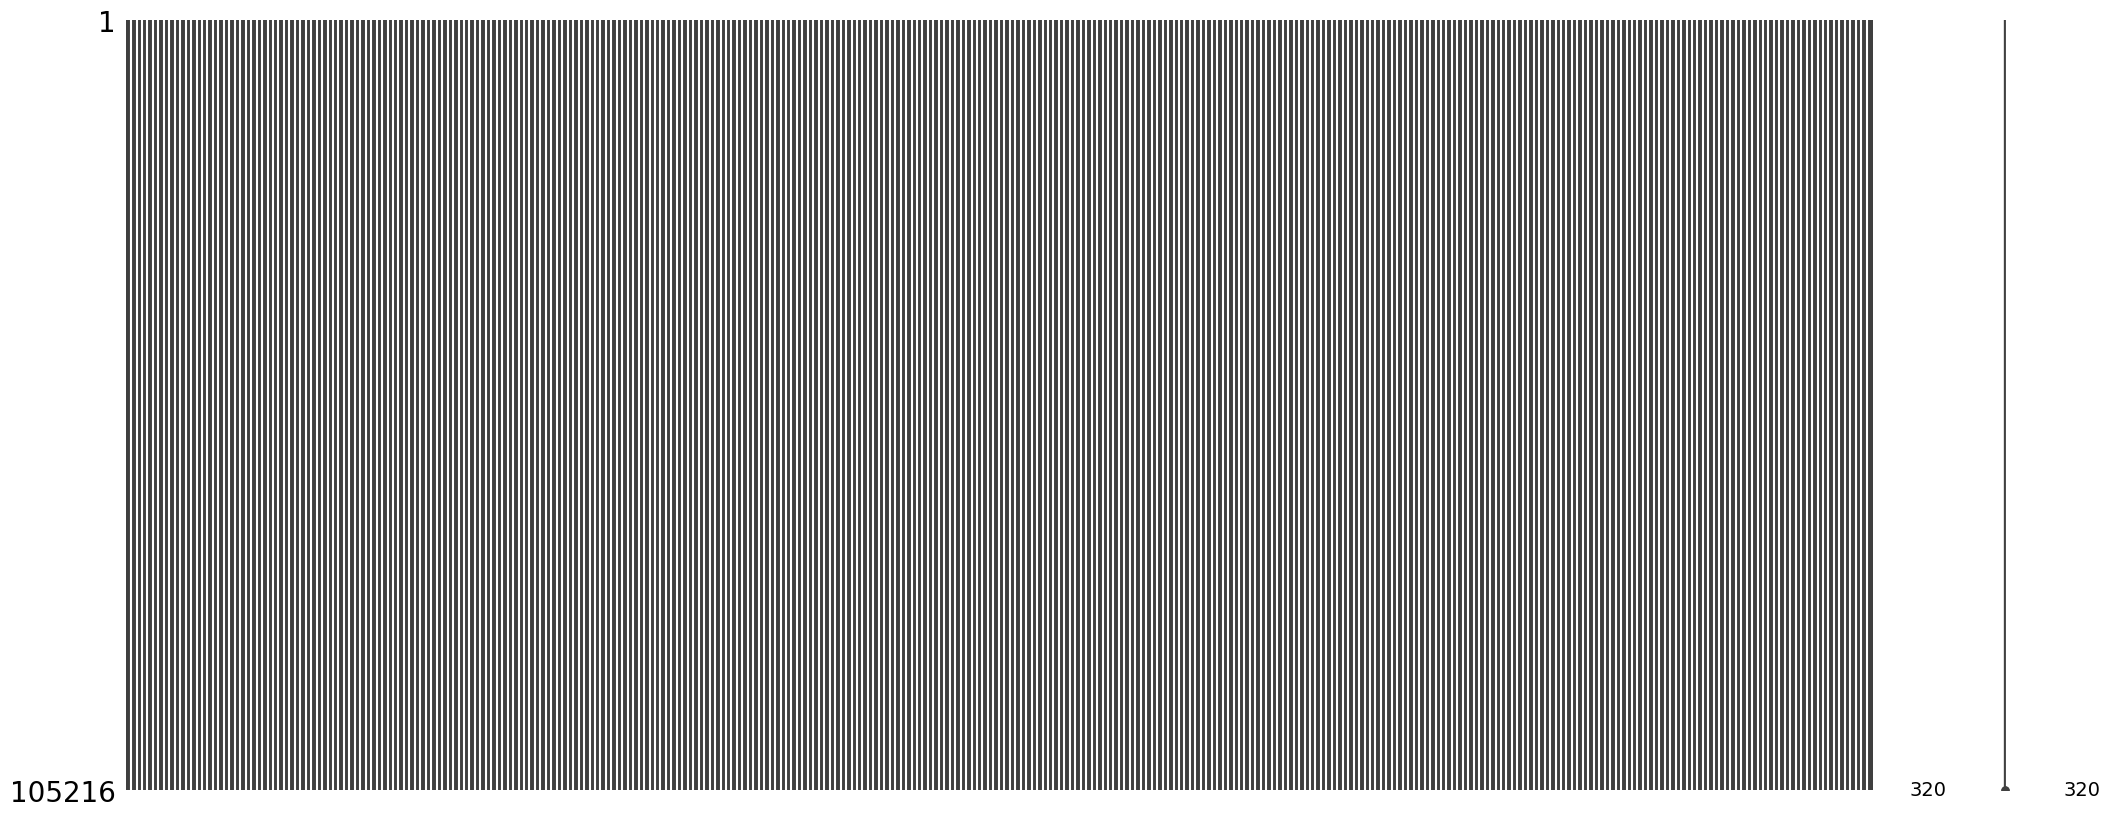

In [16]:

import missingno as msno

msno.matrix(df_filtered_15min)


In [17]:
df_marked

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_360,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369
2012-01-01 00:15:00,3.807107,22.759602,77.324066,136.178862,70.731707,351.190476,9.609949,279.461279,75.174825,87.096774,...,223.684211,128.479657,28500.0,1729.957806,1704.545455,15.645372,12.873025,504.828797,63.439065,761.730205
2012-01-01 00:30:00,5.076142,22.759602,77.324066,136.178862,73.170732,354.166667,9.044658,279.461279,73.426573,84.946237,...,236.842105,127.765882,26400.0,1654.008439,1659.090909,15.645372,13.458163,525.021949,60.100167,702.346041
2012-01-01 00:45:00,3.807107,22.759602,77.324066,140.243902,69.512195,348.214286,8.479367,279.461279,75.174825,91.397849,...,214.912281,114.204140,25200.0,1333.333333,1636.363636,15.645372,10.532475,526.777875,56.761269,696.480938
2012-01-01 01:00:00,3.807107,22.759602,77.324066,140.243902,75.609756,339.285714,7.348785,279.461279,68.181818,88.172043,...,200.657895,112.062812,23800.0,1324.894515,1636.363636,15.645372,14.628438,539.947322,63.439065,693.548387
2012-01-01 01:15:00,5.076142,22.048364,77.324066,146.341463,73.170732,342.261905,6.783493,265.993266,69.930070,86.021505,...,199.561404,112.776588,23700.0,1118.143460,1659.090909,15.645372,9.947338,556.628622,68.447412,723.607038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 23:00:00,2.538071,22.048364,1.737619,150.406504,85.365854,303.571429,11.305822,282.828283,68.181818,72.043011,...,206.140351,276.945039,28200.0,1616.033755,1363.636364,29.986962,5.851375,697.102722,176.961603,651.026393
2014-12-31 23:15:00,2.538071,21.337127,1.737619,166.666667,81.707317,324.404762,11.305822,252.525253,64.685315,72.043011,...,192.982456,279.800143,28300.0,1569.620253,1340.909091,29.986962,9.947338,671.641791,168.614357,669.354839
2014-12-31 23:30:00,2.538071,20.625889,1.737619,162.601626,82.926829,318.452381,10.175240,242.424242,61.188811,74.193548,...,191.885965,284.796574,27800.0,1556.962025,1318.181818,27.379400,9.362200,670.763828,153.589316,670.087977
2014-12-31 23:45:00,1.269036,21.337127,1.737619,166.666667,85.365854,285.714286,10.175240,225.589226,64.685315,72.043011,...,190.789474,246.252677,28000.0,1443.037975,909.090909,26.075619,4.095963,664.618086,146.911519,646.627566


In [20]:
df_marked.to_pickle('../Data/ELC_12-14_15min_dropped.pkl')

In [21]:
df = df_marked.copy()

In [22]:
print(df.isna().sum().sum())

16909


In [25]:
df_avg = []
for i in tqdm(range(df.shape[0])):
    df_avg.append(df.iloc[i,:].sum()/len(df.iloc[i,:].dropna()))
df_avg = pd.DataFrame(df_avg,index=df.index,columns=['avg'])
df_avg

100%|██████████| 105216/105216 [00:09<00:00, 10587.83it/s]


,avg
2012-01-01 00:15:00,378.029580
2012-01-01 00:30:00,371.806769
2012-01-01 00:45:00,368.919423
2012-01-01 01:00:00,359.428682
2012-01-01 01:15:00,353.249965
...,...
2014-12-31 23:00:00,369.463812
2014-12-31 23:15:00,361.457805
2014-12-31 23:30:00,358.215803
2014-12-31 23:45:00,353.476149


In [26]:
df_avg = df_avg.resample('1D').sum()
df_avg = df_avg.loc['2012-01-01':'2014-12-31']
df_avg

,avg
2012-01-01,38313.751557
2012-01-02,57225.098775
2012-01-03,57294.353754
2012-01-04,57503.687632
2012-01-05,57662.515150
...,...
2014-12-27,52452.104786
2014-12-28,51899.725502
2014-12-29,52114.818246
2014-12-30,51946.361511


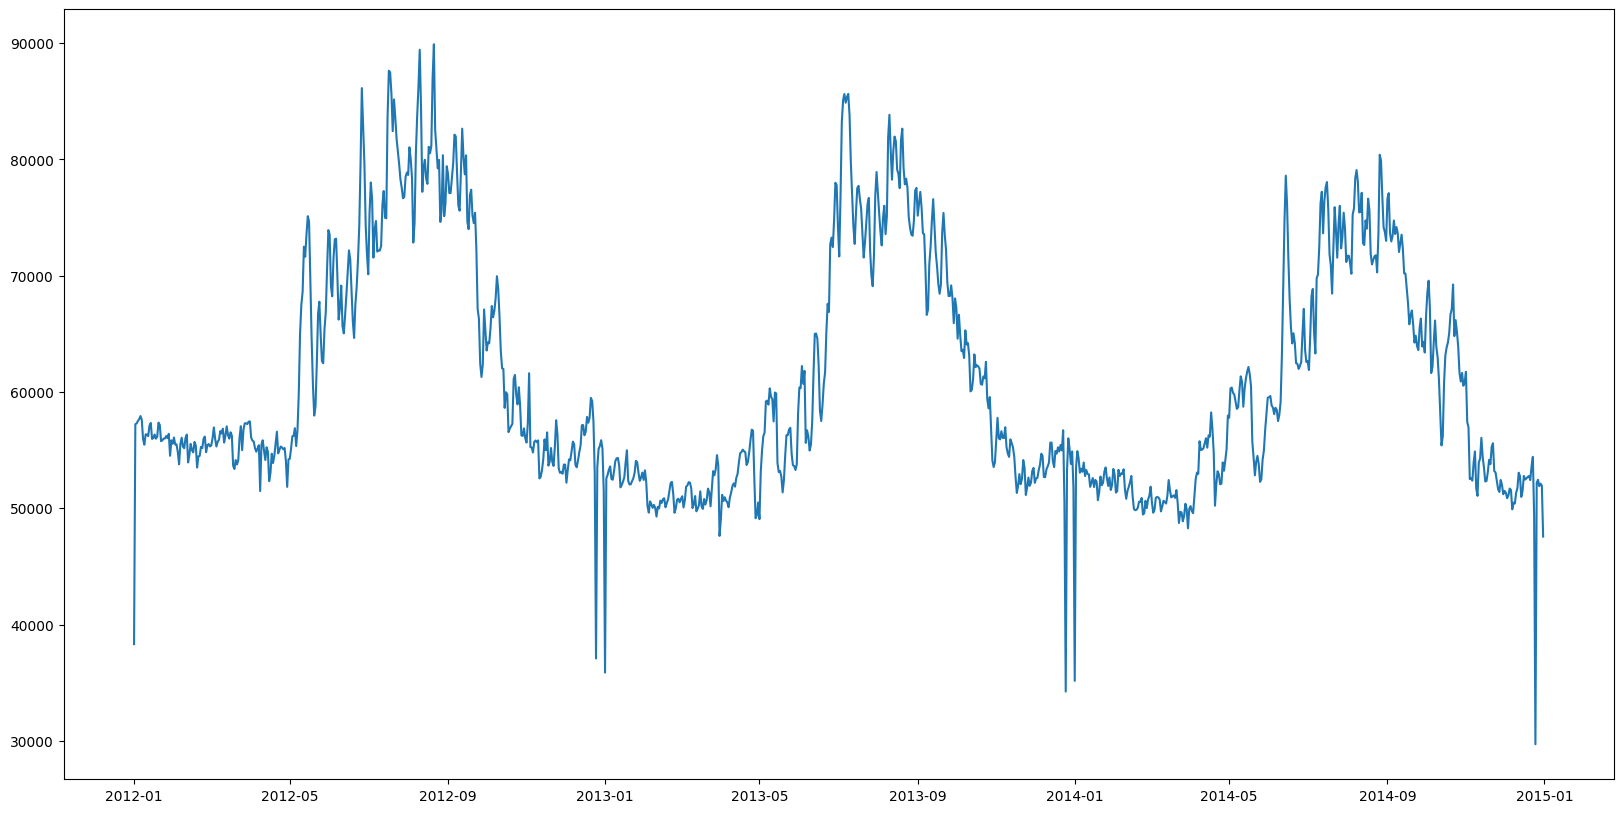

In [27]:
plt.figure(figsize=(20,10))
plt.plot(df_avg)

In [28]:
df_avg['ds'] = df_avg.index
df_avg['y'] = df_avg['avg']
df_avg = df_avg.drop('avg',axis=1)
df_avg

,ds,y
2012-01-01,2012-01-01,38313.751557
2012-01-02,2012-01-02,57225.098775
2012-01-03,2012-01-03,57294.353754
2012-01-04,2012-01-04,57503.687632
2012-01-05,2012-01-05,57662.515150
...,...,...
2014-12-27,2014-12-27,52452.104786
2014-12-28,2014-12-28,51899.725502
2014-12-29,2014-12-29,52114.818246
2014-12-30,2014-12-30,51946.361511


In [29]:
df_avg.to_pickle('../Data/ELC_12-14_1D_dropped_avg.pkl')